# Rebaul main equations
Mass conservation reads

\begin{equation}
\frac{d}{dt}(\rho V) = q
\end{equation}

Considering small variations of the volume the equation becomes

\begin{equation}
V_0\frac{d\rho}{dp}\frac{dp}{dt} + V_0\frac{d\rho}{dT}\frac{dT}{dt} + V_0\frac{\rho}{k_{ch}}\frac{dp}{dt} = q
\end{equation}

$V_0$ is the chamber volume and $k_{ch}$ is the chamber bulk modulus.
which in turn is

\begin{equation}
\frac{dp}{dt}(\frac{1}{\rho}\frac{d\rho}{dp}+ \frac{1}{k_{ch}}) = \frac{1}{\rho}\frac{q}{V_0} - \frac{1}{\rho}\frac{d\rho}{dT}\frac{dT}{dt} 
\end{equation}

We can set 

\begin{equation}
\bar\beta(p,T) = \frac{1}{\rho}\frac{d\rho}{dp}+ \frac{1}{k_{ch}}
\end{equation}

\begin{equation}
\bar\alpha(p,T) = \frac{1}{\rho}\frac{d\rho}{dT}
\end{equation}

So that mass conservation becomes
\begin{equation}
\bar\beta\frac{dp}{dt} = \frac{q}{\rho V_0} - \bar\alpha\frac{dT}{dt} 
\end{equation}

where $\bar\beta$ and $\bar\alpha$ are the effective coefficients of compressibility and thermal expansion respectively.

Now we need to specify the equations for the liquid, crystal and gas mixture density.

\begin{equation}
\rho = (\frac{x_g}{\rho_g} + \frac{(1-x_g)}{\rho_b})^{-1}
\end{equation}

where $x_g$ is the mass fraction of gas, $\rho_g$ is its density and $\rho_b$ is the density of the crystal and liquid mixture.

We assume that exsolved volatiles behave like a perfect gas so that
\begin{equation}
\rho_g = \frac{p}{RT}
\end{equation}

The density of the magma (liquid and crystals) is

\begin{equation}
(\frac{x_c}{\rho_c} + \frac{(1-x_c)}{\rho_c})^{-1}
\end{equation}

Where $x_c is the mass fraction of the crystal excluding the volatiles.

The mass fraction of the volatiles $x_g$ is found using mass conservation and Henry solulibility law.For basalts this is
\begin{equation}
x_d = sp^{1/2}
\end{equation}

so that the mass fraction of gas is

\begin{equation}
x_g = x_t - -x_d =x_t- sp^{1/2}(1 - x_c)
\end{equation}

where x_t is the total volatile content in the magma. We can then caculate

\begin{equation}
\frac{d\rho}{dT} = -\rho^2[\frac{x_g R}{p} -\ x_d\Gamma(\frac{RT}{p}-\frac{1}{\rho_b})-(1-x_g)\Gamma(\frac{1}{\rho_c} - \frac{1}{\rho_l})]
\end{equation}
where \gamma is the crystallization rate $\gamma$
\begin{equation}
\frac{d\rho}{dp} = \rho^2  (\frac{x_g  R  T}  {p^2} 
                              + \frac{(1 - x_g)}{ k_l \rho_b}
                              +\frac{1}{2}sp^{-1 /2}(\frac{R T }{p} - \frac{1}{\rho_b}))
\end{equation}

Combining this equation together we can calculate $\bar\beta$ and $\bar\alpha$



In [249]:
import numpy as np
import matplotlib.pyplot as plt
from density_lib import *
rhol0 = 2700
rhoc0 = 3100
R = 462 #Gas constant from woods and huppert
G = 1e+10
kl = 5e+10
kch = (3 / (4 * G))**-1 #bulk modulus chamber
Tl = 1300
Ts = 1050
gamma  =  1 / (Tl - Ts)
s = 4.11 * 1e-6 #Exponent of the fink law from huppert and woods
G = 1e+10
dp = 1e+5
xt = 0.025              
zc = 2.0e+3
pc = rhol0 * 9.8 * zc

### Plots of the effective compressibility $\bar\beta$ and effective thermal expansion $\bar\alpha$
As shown above the conservation of mass with the effective compressibility and thermal expansion is

\begin{equation}
\bar\beta\frac{dp}{dt} = \frac{q}{\rho V_0} - \bar\alpha\frac{dT}{dt} 
\end{equation}

with

\begin{equation}
\bar\beta(p,T) = \frac{1}{\rho}\frac{d\rho}{dp}+ \frac{1}{k_{ch}}
\end{equation}

\begin{equation}
\bar\alpha(p,T) = \frac{1}{\rho}\frac{d\rho}{dT}
\end{equation}

In the next figures we show the variation of these coeffiecients with pressure and temperature. We consider a magma with a total volatile content of 0.02. For the $\bar\beta$ the calculation is shown for a total crystal content of 0.2. For the $\bar\alpha$ the pressure is set at 55 MPa, which corresponds to a chamber depth of about 2 km.
For $\bar\beta$ undergoes a large change at about 25 MPa, which corresponds to the pressure at which all the volatiles are back in solution. At lower pressures, some of the volatiles are exsolved and the compressibility is much higher.
The $\bar\alpha$ evolution is more complex. At high temperatures (T > 1250), there is only melt, so that the effective thermal expansion is zero (in the model we neglected the thermal expansion of the liquid because it is dwarfed by the changes associated with chrystallization and exsolution). In the interval 1775-1250 we have only crystallization and no volatiles exsolves so that the system is effectively contracting, which corresponds to a small and negative coefficient. However, below 1175 $\alpha\bar becomes positive with a strong discontinuity: this jump is associated with the exsolution of volatiles. Finally below 1050 all the magma as crystallized.


Text(0, 0.5, '$alpha_{eff}$ [C$^{-1}$]')

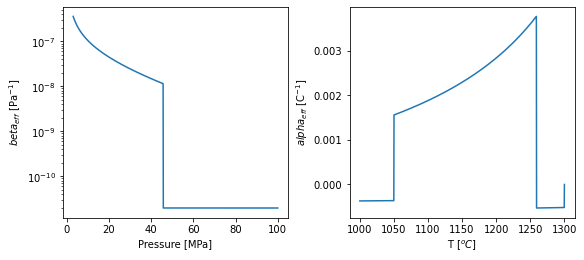

In [250]:
T = np.linspace(1300,1000,1000) + 273
rho = []
drhodT = []
for i in range(len(T)):
    rho.append(calc_rho(pc,T[i],s,rhol0,rhoc0,Tl,Ts,xt,kl,R))
    drhodT.append(calc_drhodT(pc,T[i],s,rhol0,rhoc0,Tl,Ts,xt,kl,gamma,R))
rho = np.array(rho)
drhodT = np.array(drhodT)
alpha_eff = 1 / rho * drhodT
p = np.linspace(3e+6,100e+6,1000)
xc = 0.1
Tp = calc_T(xc, Tl, Ts) + 273
rho = []
drhodp = []
for i in range(len(p)):
    rho.append(calc_rho(p[i],Tp,s,rhol0,rhoc0,Tl,Ts,xt,kl,R))
    drhodp.append(calc_drhodp(p[i],Tp,s,rhol0,rhoc0,Tl,Ts,xt,kl,R))
rho = np.array(rho)
drhodT = np.array(drhodT)
beta_eff = 1 / rho * drhodp
fig = plt.figure(figsize=(8,3.5), constrained_layout = True)
ax1 = fig.add_subplot(121)  # equivalent but more general
ax1.semilogy(p/1e+6,beta_eff)
ax1.set_xlabel('Pressure [MPa]')
ax1.set_ylabel('$beta_{eff}$ [Pa$^{-1}$]')
ax2 = fig.add_subplot(122)  # equivalent but more general
ax2.plot(T-273,alpha_eff)
ax2.set_xlabel('T [$^oC$]')
ax2.set_ylabel('$alpha_{eff}$ [C$^{-1}$]')

# Plots of fluxes and temprature changes
Given mass conservation

\begin{equation}
\bar\beta\frac{dp}{dt} = \frac{q}{\rho V_0} - \bar\alpha\frac{dT}{dt} 
\end{equation}

we might wander what is the instantaneous rate of pressurization for a given mass flux $q$ and heating cooling rate $\frac{dT}{dt}$

In [258]:
q = np.linspace(0.1,10,100) * rhol0
dTdtlog = np.linspace(-6,-12)
dTdt = 10**dTdtlog
dTdt = np.concatenate((-dTdt,dTdt[::-1]))
V0 = 5e+9
xc = 0.2
T = calc_T(xc, Tl, Ts) + 273
DT,Q = np.meshgrid(dTdt,q)
dpdt = np.zeros(DT.shape)
rho = calc_rho(pc,T,s,rhol0,rhoc0,Tl,Ts,xt,kl,R)
drhodp = calc_drhodp(pc,T,s,rhol0,rhoc0,Tl,Ts,xt,kl,R)
drhodT = calc_drhodT(pc,T,s,rhol0,rhoc0,Tl,Ts,xt,kl,gamma,R)
beta_eff = 1 / rho * drhodp
alpha_eff = 1 / rho * drhodT
xg = calc_xg(pc, xc, xt, s)
for i in range(len(q)):
    for j in range(len(dTdt)):
        dpdt[i,j] = 1 / beta_eff * (q[i] / (rho * V0) - alpha_eff * dTdt[j])

Text(0, 0.5, 'q [m$^3$ s$^{-1}]$')

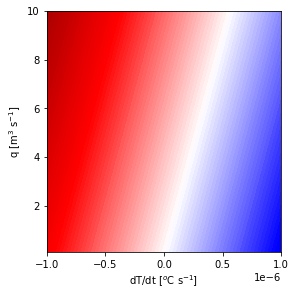

In [259]:
fig = plt.figure(figsize=(4,4), constrained_layout = True)
ax = fig.add_subplot(111)  # equivalent but more general
ax.contourf(dTdt,q / rhol0,dpdt * (3600 *24 * 365) / 1e+6,100,cmap='seismic',vmin = -25,vmax= 25)
ax.set_xlabel('dT/dt [$^o$C s$^{-1}$] ')
ax.set_ylabel('q [m$^3$ s$^{-1}]$')

We now turn to examine the full dyncamic model. Initially let's suppose that the upper chamber is connected to the lower chamber which has constant overpressure through a conduit.
The flux in the upper chamber is given by
\begin{equation}
q(t) =k \rho_0 (p_d - p)
\end{equation}
with $k$ beign a lumped parameter describing the hydraulic connectivity between the two chambers.
Mass conservation becomes

\begin{equation}
\bar\beta\frac{dp}{dt} = k \rho_0\frac{p_d-p}{\rho V_0} - \bar\alpha\frac{dT}{dt} 
\end{equation}

The last equation needed to close the problem is the conservation of energy

\begin{equation}
M(C_p + L \Gamma)\frac{dT}{dt} = -F_c + (C_p + L \Gamma) \rho_0 k(p_d-p) (T_0 - T)
\end{equation}

Here $M$ is the mass of the magma in the chamber $C_p$ and $L$ are the specific heat and the latent heat of cystallization. $F_c$ is the heat flux in the host rock. $F_c$depends on the convective regime in the chamber and it is subject to karge uncertainties so that, at this stage, we consider it constant and explore a range of values.

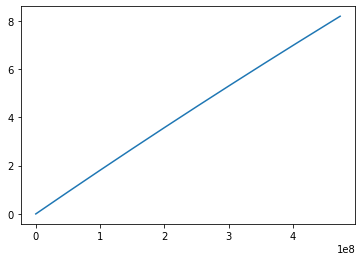

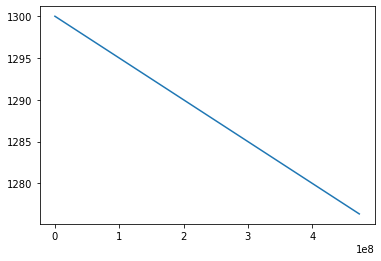

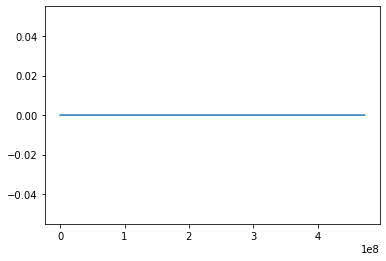

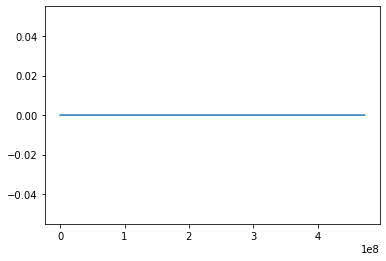

In [384]:
from scipy.integrate import solve_ivp

def dpdt_dTdt(t,y):
    p,M,T = y
    rho = calc_rho(p,T,s,rhol0,rhoc0,Tl,Ts,xt,kl,R)
    drhodp = calc_drhodp(pc,T,s,rhol0,rhoc0,Tl,Ts,xt,kl,R)
    drhodT = calc_drhodT(pc,T,s,rhol0,rhoc0,Tl,Ts,xt,kl,gamma,R)
    alpha_eff = 1 / rho * drhodT
    beta_eff = 1 / rho * drhodp + 1 / k_ch
    q = k * (pd -  p) * rhol0
    Fc = coolrate * thermal_const * M 
    dTdt = (-Fc + thermal_const * q * (Ti - T)) / (thermal_const * M)
    #dTdt = 0
    return [1 / ( beta_eff) * ( q / (V0 * rho) - alpha_eff *dTdt), q ,dTdt ]

rhol0 = 2700
g = 9.8
L = 3e+5
Cp = 1e+3
years = 15
tend = 3600 * 24 * 365 * years
coolrate = 5e-8
V0 = 5e+9
k_ch = (3 / (4 * G))**-1 #bulk modulus chamber
deltaP0 = 5e+6 #initial pressure difference
q0 = 0. #in cubic meter
k = q0 / deltaP0
xt = 0.03
xc = 0.
zc = 2300
plc = rhol0 * g * zc
pd= plc + deltaP0
thermal_const = Cp + L * gamma
p0 = plc
T0 = calc_T(xc, Tl, Ts) + 273
Ti = Tl + 273 #injection
rho0 = calc_rho(p0,T0,s,rhol0,rhoc0,Tl,Ts,xt,kl,R)
M0 = rho0 * V0
t = np.linspace(0,tend,3000)
sol = solve_ivp(dpdt_dTdt,[0,tend],np.array([p0,M0,T0]),method = 'Radau',t_eval = t)
t = sol.t
p = sol.y[0]
M = sol.y[1]
T = sol.y[2]
xg = []
for i in range(len(p)):
    xc = calc_xc(T[i],Tl,Ts)
    xg.append(calc_xg(p[i], xc, xt, s))
q = k * (pd - p)
plt.plot(t,(p-p0) / 1e+6)
plt.figure()
plt.plot(t,T-273)
plt.figure()
plt.plot(t,q)
plt.figure()
plt.plot(t,xg)

In [373]:
T0 - 273

1300.0

In [307]:
a

[0.11725376247883522, 13500.0, -3.4417363256701575e-07]